<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Loading data into a Pyleoclim Series

## Authors
Jordan Landers1

1 Department of Earth Sciences, University of Southern California

Author1 = {"name": "Jordan Landers", "affiliation": "Department of Earth Sciences, University of Southern
California", "email": "lplander@usc.edu", "orcid": "0000-0001-9772-7617"}

## Preamble
Contrary to common beliefs, Pyleoclim is not specific to the LiPD file ecosystem.  The object at the heart of the package is the
[`Series` object](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#series-pyleoclim-series), which describes the fundamentals of a time series. To create a
Pyleoclim `Series`, we first need to load the data set, and then specify values for its various properties:

* `time`: Time values for the time series
* `value`: Paleo values for the time series
* `time_name` (optional): Name of the time vector, (e.g., 'Time', 'Age'). This is used to label the x-axis on plots
* `time_unit` (optional): The units of the time axis (e.g., 'years')
* `value_name` (optional): The name of the paleo variable (e.g., 'Temperature')
* `value_unit` (optional): The units of the paleo variable (e.g., 'deg C')
* `label` (optional): Name of the time series (e.g., 'Nino 3.4')
* `clean_ts` (optional): If True (default), remove NaNs and set an increasing time axis.

Data may be stored in different file types, which can be ingested in different ways.  

### Goals:
* Create Pyleoclim Series objects from datasets stored as CSV, NetCDF, LiPD, and NOAA txt files.

**Reading Time:** 5 minutes

### Keywords

CSV; NetCDF; LiPD, Series; EnsembleSeries

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/ec_workshops_py/.

### Relevant Packages

Pandas; Xarray

## Data Description

* McCabe-Glynn, S., Johnson, K., Strong, C. et al. Variable
North Pacific influence on drought in southwestern North America since AD 854. Nature Geosci 6, 617–621 (2013).
[doi:10.1038/ngeo1862](https://doi.org/10.1038/ngeo1862)

* Euro2k database: PAGES2k Consortium., Emile-Geay, J., McKay, N. et al. A global multiproxy database for temperature
 reconstructions of the Common Era. Sci Data 4, 170088 (2017). [doi:10.1038/sdata.2017.88](https://doi.org/10.1038/sdata.2017.88)

* Lisiecki, L. E., and Raymo, M. E. (2005), A Pliocene-Pleistocene stack of 57 globally distributed benthic
δ18O records, Paleoceanography, 20, PA1003, [doi:10.1029/2004PA001071](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2004PA001071).

## Demonstration
First we import our favorite package:

In [1]:
import pyleoclim as pyleo
pyleo.__version__

'0.7.5b0'

### LiPD
Linked Paleo Data format ([LiPD](http://www.clim-past-discuss.net/11/4309/2015/cpd-11-4309-2015-discussion.html)) files contain time series information in addition to supporting metadata (e.g., root metadata, location).
Pyleoclim leverages this additional information using LiPD-specific functionality discussed in greater depth in [this
 tutorial]().

Data stored in the `.lpd` format can be loaded directly into Pyleoclim as a
[Lipd object](https://pyleoclim-util.readthedocs.io/en/master/core/api.html?highlight=lipd#pyleoclim.core.lipd.Lipd).
If the data_path points to one LiPD file, `pyleo.Lipd` will load the specific record, while if data_path points to a
folder of lipd files, `pyleo.Lipd` will load the full set of records.

##### Loading a single LiPD file

In [2]:
data_path = '../data/Crystal.McCabe-Glynn.2013.lpd'
d = pyleo.Lipd(data_path)

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Crystal.McCabe-Glynn.2013.lpd
1.42 MB :That's a big file! This may take a while to load...
Finished read: 1 record


As a check to make sure the LiPD file corresponds to the expected record, we can quickly generate a map that
indicates the location.

(<Figure size 432x288 with 1 Axes>, <GeoAxesSubplot:>)

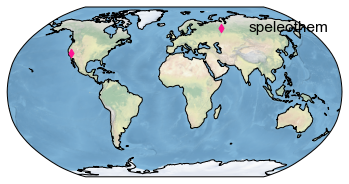

In [3]:
d.mapAllArchive()

##### Loading multiple LiPD files

In [4]:
data_path = '../data/Euro2k/'
d_multiple = pyleo.Lipd(data_path)

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 31 LiPD file(s)
reading: Ocn-RedSea.Felis.2000.lpd
reading: Arc-Forfjorddalen.McCarroll.2013.lpd
reading: Eur-Tallinn.Tarand.2001.lpd
reading: Eur-CentralEurope.Dobrovoln.2009.lpd
reading: Eur-EuropeanAlps.Bntgen.2011.lpd
reading: Eur-CentralandEasternPyrenees.Pla.2004.lpd
reading: Arc-Tjeggelvas.Bjorklund.2012.lpd
reading: Arc-Indigirka.Hughes.1999.lpd
reading: Eur-SpannagelCave.Mangini.2005.lpd
reading: Ocn-AqabaJordanAQ19.Heiss.1999.lpd
reading: Arc-Jamtland.Wilson.2016.lpd
reading: Eur-RAPiD-17-5P.Moffa-Sanchez.2014.lpd
reading: Eur-LakeSilvaplana.Trachsel.2010.lpd
reading: Eur-NorthernSpain.Martn-Chivelet.2011.lpd
reading: Eur-MaritimeFrenchAlps.Bntgen.2012.lpd
reading: Ocn-AqabaJordanAQ18.Heiss.1999.lpd
reading: Arc-Tornetrask.Melvin.2012.lpd
reading: Eur-EasternCarpathianMountains.Popa.2008.lpd
reading: Arc-PolarUrals.Wilson.2015.lpd
reading: Eur-LakeSilvaplana.Larocque-Tobler.2010.lpd
reading: Eur

(<Figure size 432x288 with 1 Axes>, <GeoAxesSubplot:>)

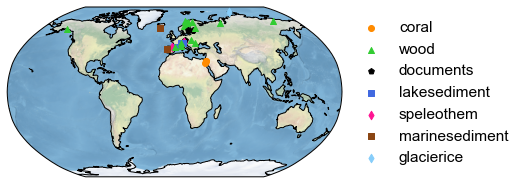

In [5]:
d_multiple.mapAllArchive(lgd_kwargs={'bbox_to_anchor': (1, 1)})

### NetCDF
In order to load data from a NetCDF file, we will use [Xarray](https://docs.xarray.dev/en/stable/index.html).

In [6]:
import xarray as xr

In [7]:
file_path = '../data/p2k_ngeo19_recons.nc'
p2k_nc = xr.open_dataset(file_path)

The coordinates of this data set are `year` and `ens`, and the temperature anamoly is contained in the variable
`LMRv2.1`. Below we extract the timeseries for the ensemble runs:

In [8]:
variable_name = 'LMRv2.1'
ens_runs = p2k_nc.groupby('ens')

To create the `pyleo.Series`, we pass the time coordinate of the dataset, `p2k_nc.year`, as `time`, and one of the ensemble runs as `value`. It is optional to specify `time_name` and `time_unit`, and
`value_name` and `value_unit`, but doing so ensures that plot axes are properly labeled.

In [9]:
ens_run1 = ens_runs[1].data_vars[variable_name]
p2k_ps = pyleo.Series(time=p2k_nc.year, value=ens_run1,
                      time_name='Time', time_unit='year', label = 'LMRv2.1 member #1',
                      value_name='GMST', value_unit='$^{\circ}$C')

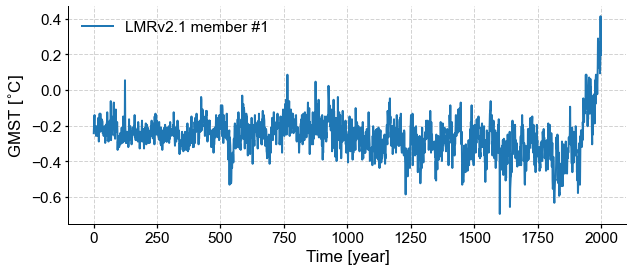

In [10]:
fig, ax = p2k_ps.plot()

However, given this is an ensemble, capturing this data in a `pyleo.EnsembleSeries` will open up opportunities for
specific analysis and visualization. In the cell below, we generate a list of `pyleo.Series` (one for each trace) for
the full set of ensemble runs in much the same way as above.

In [11]:
%%time
ts_list = []

for im in range(len(p2k_nc.ens)):
    ens_run = ens_runs[im+1].data_vars[variable_name]
    ts_list.append(pyleo.Series(time=p2k_nc.year, value=ens_run,
                      time_name='Time', time_unit='year',
                      value_name='GMST', value_unit='$^{\circ}$C'))

CPU times: user 516 ms, sys: 4.68 ms, total: 521 ms
Wall time: 520 ms


Then we simply pass `ts_list` to `pyleo.EnsembleSeries`...

In [12]:
ts_ens = pyleo.EnsembleSeries(ts_list)

For more detail on visualizing `pyleo.EnsembleSeries`, check out the tutorial on [Basic operations with
MultipleSeries and EnsembleSeries](), but we can use `plot_traces()` to quickly check to make sure the data seems
properly organized (by default, `plot_traces()` plots 10 randomly selected traces).

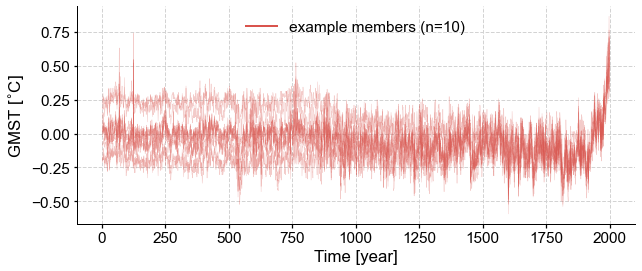

In [13]:
fig, ax = ts_ens.plot_traces()

### CSV
CSV files have a table structure, so we will use [Pandas](https://pandas.pydata.org) and the read the data into a pandas `DataFrame`.

In [14]:
import pandas as pd

In [15]:
LR04 = pd.read_csv('../data/LR04.csv', header=4)
LR04.head()

,Time (ka),Benthic d18O (per mil),Standard error (per mil)
0,0.0,3.23,0.03
1,1.0,3.23,0.04
2,2.0,3.18,0.03
3,3.0,3.29,0.03
4,4.0,3.30,0.03


In [16]:
LR04.columns

Index(['Time (ka)', 'Benthic d18O (per mil)  ', 'Standard error (per mil)'], dtype='object')

To create a `pyleo.Series`, we pass the `Time (ka)` column as `time` and the `Benthic d18O (per mil)` column as `value`. Note the extra space at the end of that column name! We have to work with what the interwebs give us.

In [17]:
LR04_ps = pyleo.Series(time=LR04['Time (ka)'], value=LR04['Benthic d18O (per mil)  '],
                      time_name='Time', time_unit='ka',
                      value_name='$\delta^{18}$O', value_unit=u'‰')

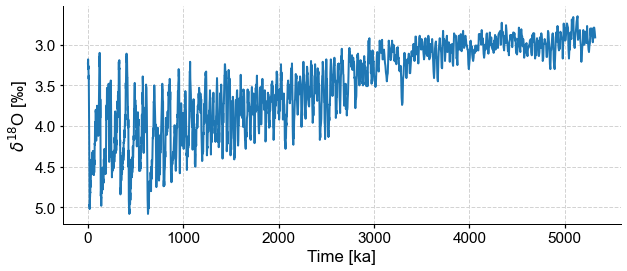

In [18]:
fig, ax = LR04_ps.plot()
ax.invert_yaxis()

### NOAA txt files

As you may now, the World Data Service for paleoclimatology, operated by NCEI/NOAA of the US Department of Commerce, hosts thousands of data files in various formats. A common one is a [templated text file](https://www.ncei.noaa.gov/pub/data/paleo/templates/noaa-wds-paleo-template-instructions.txt), containing rich data and metadata. LinkedEarth will soon develop ways to ingest such files directly into LiPD. In the meantime, one can treat the file as a raw text file, ignoring the header and loading the data directly into a [Pandas](https://pandas.pydata.org) `DataFrame`.

In [19]:
path = 'ftp://ftp.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt'
co2df = pd.read_csv(path, skiprows=137, sep='\t')
co2df.head()

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

Notice how `pandas` retrieved the data over the network, without needing to download a local copy of the file. However, it would work just as well if you did have such a copy on your hardrive, and you would simply replace `path` with the local file path  (everything else would stay the same). We did cheat a bit, however: we had to peak at the file to know how many header lines to skip (137). The separator (`sep`) argument is set to `'\t'`, which means "tab". It works well in this case, but we cannot guarantee that it will work on all NOAA text files.

Finally, we pull the relevant columns of this datframe into a Series object, convert the years to kyr for ease of use, and put in the relevant metadata so that we can get a well-labeled, publication-quality plot right off the bat:

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='Age [kyr BP]', ylabel='$CO_2$ [ppm]'>)

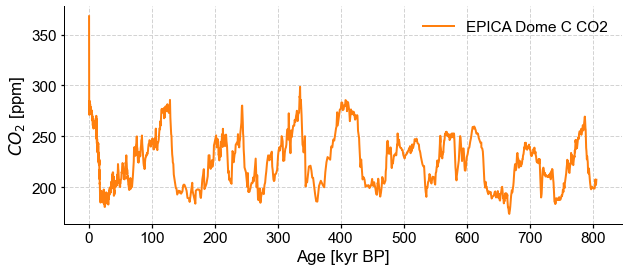

In [40]:
co2ts = pyleo.Series(time=co2df['age_gas_calBP']/1000,value= co2df['co2_ppm'],time_name='Age',time_unit='kyr BP',value_name = r'$CO_2$',value_unit='ppm',label='EPICA Dome C CO2')
co2ts.plot(color='C1')

## Loading from PANGAEA

Another major repository for paleoclimate data is [PANGAEA](https://www.pangaea.de). Here we load the dataset of [Skinner et al. (2007)](https://doi.pangaea.de/10.1594/PANGAEA.619066), using their very helpful [pangaeapy](https://github.com/pangaea-data-publisher/pangaeapy) package:

In [41]:
from pangaeapy.pandataset import PanDataSet

ds = PanDataSet('10.1594/PANGAEA.619066')
print(ds.title)
print(ds.data.head())

Deep-water temperature, stable oxygen isotopes and Mg/Ca on benthic foraminifera of sediment core MD99-2334
      Age  Mg/Ca   Temp  G. affinis δ18O  δ18O H2O      Event   Latitude  \
0  10.534  3.490  2.272             3.47      0.09  MD99-2334  37.801167   
1  11.394  3.231  1.303             4.14      0.50  MD99-2334  37.801167   
2  11.761  2.585 -1.498             3.77     -0.66  MD99-2334  37.801167   
3  12.064  2.993  0.344             3.79     -0.12  MD99-2334  37.801167   
4  12.368  2.786 -0.558             3.91     -0.25  MD99-2334  37.801167   

   Longitude  Elevation  Date/Time  
0 -10.171333    -3166.0 1999-09-14  
1 -10.171333    -3166.0 1999-09-14  
2 -10.171333    -3166.0 1999-09-14  
3 -10.171333    -3166.0 1999-09-14  
4 -10.171333    -3166.0 1999-09-14  


Once again, this method eschewed a download, retrieving the data directly from PANGAEA's web server. Notice that all you needed was the dataset DOI, easily gleaned from the page's URL or from the contents themselves.  The `PanDataSet` is a custom data structure built on `pandas`, much in the way Pyleoclim `Series` will be in a few releases. 

One can extract the dataset column names via:

In [42]:
ds.data.columns

Index(['Age', 'Mg/Ca', 'Temp', 'G. affinis δ18O', 'δ18O H2O', 'Event',
       'Latitude', 'Longitude', 'Elevation', 'Date/Time'],
      dtype='object')

In [43]:
type(ds.data['Temp']) 

pandas.core.series.Series

As a pandas Series object, this variable has an associated plot method:

<AxesSubplot:>

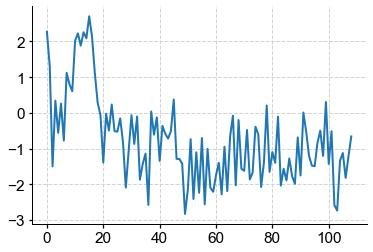

In [44]:
ds.data['Temp'].plot()

However, we see that the x-axis knows nothing about time; indeed, PANGAEA services a dizzying array of dataset types, and their API has to be very general. This is one reason to have a Pyleoclim Series class that knows explicitly about time. Let us create an instance here, with proper metadata that are not available in the original, barebones PANGAEA format:

In [45]:
S07_temp = pyleo.Series(time=ds.data['Age'], value=ds.data['Temp'],
                      time_name='Age', time_unit='ka BP',
                      value_name='Temperature', value_unit=r'$^{\circ}$ C')

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='Age [ka BP]', ylabel='Temperature [$^{\\circ}$ C]'>)

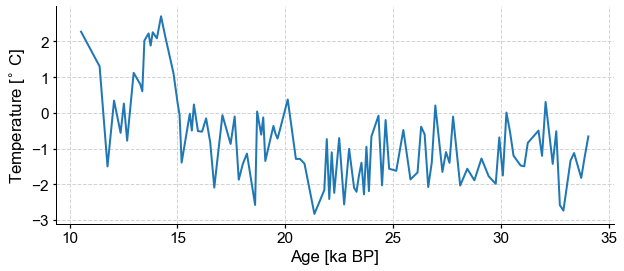

In [46]:
S07_temp.plot()

As of now, you can create this object manually, but we will soon automate this process to a large extent. Let us also load their reconstruction of seawater $\delta^{18}$O:

In [47]:
S07_d18Osw = pyleo.Series(time=ds.data['Age'], value=ds.data['δ18O H2O'],
                      time_name='Age', time_unit='ka BP',
                      value_name='seawater $\delta^{18}$O', value_unit='$\perthousand$')

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='Age [ka BP]', ylabel='seawater $\\delta^{18}$O [$\\perthousand$]'>)

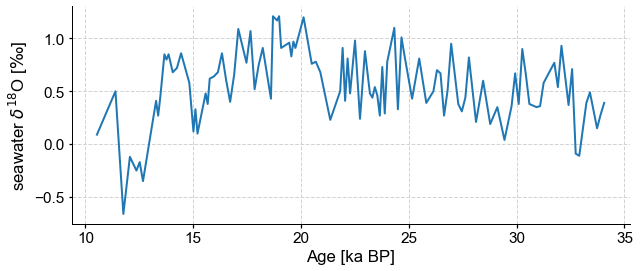

In [48]:
S07_d18Osw.plot()

We can put both series into a [MultipleSeries](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#multipleseries-pyleoclim-multipleseries) object, which unlocks fun features, like `stackplot()`:

(<Figure size 432x288 with 3 Axes>,
 {0: <Axes:ylabel='Temperature [$^{\\circ}$ C]'>,
  1: <Axes:ylabel='seawater $\\delta^{18}$O [$\\perthousand$]'>,
  2: <Axes:xlabel='Age [ka BP]'>})

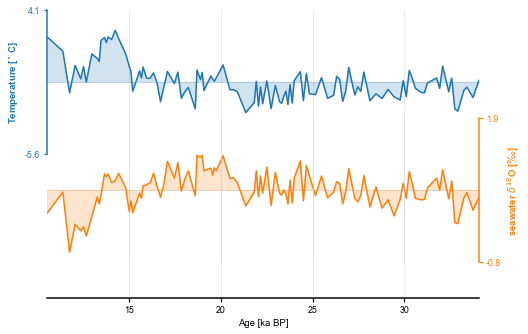

In [49]:
ms = pyleo.MultipleSeries([S07_temp,S07_d18Osw])
ms.stackplot()

For more information on `MultipleSeries`, read the [documentation](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#multipleseries-pyleoclim-multipleseries) and/or follow the tutorial `basic_MSES_manipulation.ipynb`.

## Takeway

There are multiple paths into Series, unlocking the full power of `Pyleoclim` to work with data originally stored in all manner of formats. 